# Ex2 - Getting and Knowing your Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [2]:
import numpy as np
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [1]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

### Step 3. Assign it to a variable called chipo.

In [3]:
chipo = pd.read_csv(url, delimiter='\t')

### Step 4. See the first 10 entries

In [4]:
chipo.head(10)

order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   
5  [Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...    $10.98   
6                                                NaN     $1.69   
7  [Tomatillo Red Chili Salsa, [Fajita Vegetables...    $11.75   
8  [Tomatillo Green Chili Salsa, [Pinto Beans, Ch...     $9.25   
9  [Fresh Tomato Salsa, [Rice, Black Beans, Pinto...     $9.25

### Step 5. What is the number of observations in the dataset?

In [8]:
chipo.shape[0]

4622

In [9]:
len(chipo)

4622

### Step 6. What is the number of columns in the dataset?

In [10]:
chipo.shape[1]

5

### Step 7. Print the name of all the columns.

In [12]:
chipo.columns.to_list()

['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

### Step 8. How is the dataset indexed?

In [13]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item? 

In [14]:
chipo.head(2)

order_id  quantity                     item_name choice_description  \
0         1         1  Chips and Fresh Tomato Salsa                NaN   
1         1         1                          Izze       [Clementine]   

  item_price  
0     $2.39   
1     $3.39

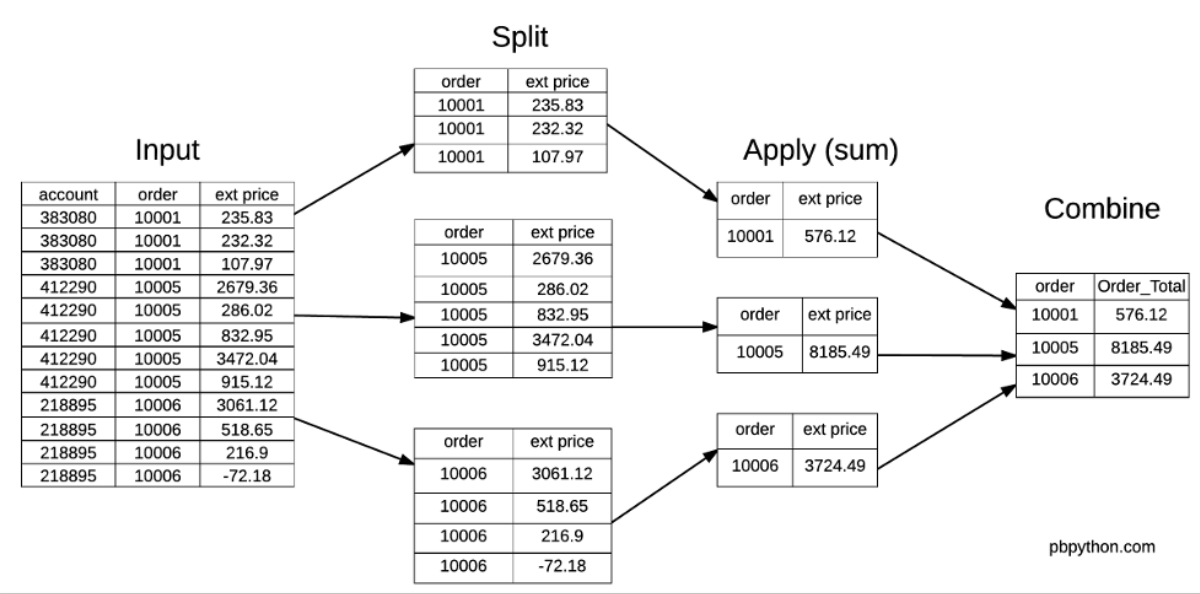

In [25]:
chipo.groupby('item_name').quantity.sum().nlargest(1).index[0]

'Chicken Bowl'

In [35]:
chipo.groupby('item_name').quantity.sum().sort_values().index[-1]

'Chicken Bowl'

### Step 10. For the most-ordered item, how many items were ordered?

In [36]:
chipo.groupby('item_name').quantity.sum().max()

761

### Step 11. What was the most ordered item in the choice_description column?

In [37]:
chipo.groupby('choice_description').quantity.sum().nlargest(1).index[0]

'[Diet Coke]'

### Step 12. How many items were orderd in total?

In [38]:
chipo.head(2)

order_id  quantity                     item_name choice_description  \
0         1         1  Chips and Fresh Tomato Salsa                NaN   
1         1         1                          Izze       [Clementine]   

  item_price  
0     $2.39   
1     $3.39

In [39]:
chipo.shape

(4622, 5)

In [40]:
chipo.item_name.nunique()

50

In [43]:
chipo.item_name.unique()

array(['Chips and Fresh Tomato Salsa', 'Izze', 'Nantucket Nectar',
       'Chips and Tomatillo-Green Chili Salsa', 'Chicken Bowl',
       'Side of Chips', 'Steak Burrito', 'Steak Soft Tacos',
       'Chips and Guacamole', 'Chicken Crispy Tacos',
       'Chicken Soft Tacos', 'Chicken Burrito', 'Canned Soda',
       'Barbacoa Burrito', 'Carnitas Burrito', 'Carnitas Bowl',
       'Bottled Water', 'Chips and Tomatillo Green Chili Salsa',
       'Barbacoa Bowl', 'Chips', 'Chicken Salad Bowl', 'Steak Bowl',
       'Barbacoa Soft Tacos', 'Veggie Burrito', 'Veggie Bowl',
       'Steak Crispy Tacos', 'Chips and Tomatillo Red Chili Salsa',
       'Barbacoa Crispy Tacos', 'Veggie Salad Bowl',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Roasted Chili Corn Salsa', 'Carnitas Soft Tacos',
       'Chicken Salad', 'Canned Soft Drink', 'Steak Salad Bowl',
       '6 Pack Soft Drink', 'Chips and Tomatillo-Red Chili Salsa', 'Bowl',
       'Burrito', 'Crispy Tacos', 'Carnitas Crispy Tacos

### Step 13. Turn the item price into a float

In [45]:
chipo.head(2)

order_id  quantity                     item_name choice_description  \
0         1         1  Chips and Fresh Tomato Salsa                NaN   
1         1         1                          Izze       [Clementine]   

  item_price  
0     $2.39   
1     $3.39

#### Step 13.a. Check the item price type

In [48]:
chipo.item_price.dtype

dtype('O')

#### Step 13.b. Create a lambda function and change the type of item price

In [49]:
price_convertion = lambda x : float(x[1:])
price_convertion('$2.15')

2.15

In [51]:
price_convertion = lambda x : float(x.replace('$', ''))
price_convertion('$2.15')

2.15

In [52]:
chipo['item_price'] = chipo.item_price.apply(price_convertion)

#### Step 13.c. Check the item price type

In [53]:
chipo.head(5)

order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description  item_price  
0                                                NaN        2.39  
1                                       [Clementine]        3.39  
2                                            [Apple]        3.39  
3                                                NaN        2.39  
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...       16.98

In [54]:
chipo.item_price.dtype

dtype('float64')

### Step 14. How much was the revenue for the period in the dataset?

In [57]:
chipo.query("item_name == 'Chips and Fresh Tomato Salsa'").sort_values('quantity')

order_id  quantity                     item_name choice_description  \
0            1         1  Chips and Fresh Tomato Salsa                NaN   
3232      1293         1  Chips and Fresh Tomato Salsa                NaN   
3228      1291         1  Chips and Fresh Tomato Salsa                NaN   
3226      1290         1  Chips and Fresh Tomato Salsa                NaN   
3198      1279         1  Chips and Fresh Tomato Salsa                NaN   
...        ...       ...                           ...                ...   
2729      1083         2  Chips and Fresh Tomato Salsa                NaN   
1882       759         2  Chips and Fresh Tomato Salsa                NaN   
2267       912         2  Chips and Fresh Tomato Salsa                NaN   
1257       511         4  Chips and Fresh Tomato Salsa                NaN   
3598      1443        15  Chips and Fresh Tomato Salsa                NaN   

      item_price  
0           2.39  
3232        2.95  
3228        2.39  
3226        2.39  
3198        2.95  
...          ...  
2729        5.90  
1882        5.90  
2267        5.90  
1257       11.80  
3598       44.25  

[110 rows x 5 columns]

In [58]:
chipo.item_price.sum()

34500.16

### Step 15. How many orders were made in the period?

In [59]:
chipo.order_id.nunique()

1834

### Step 16. What is the average revenue amount per order?

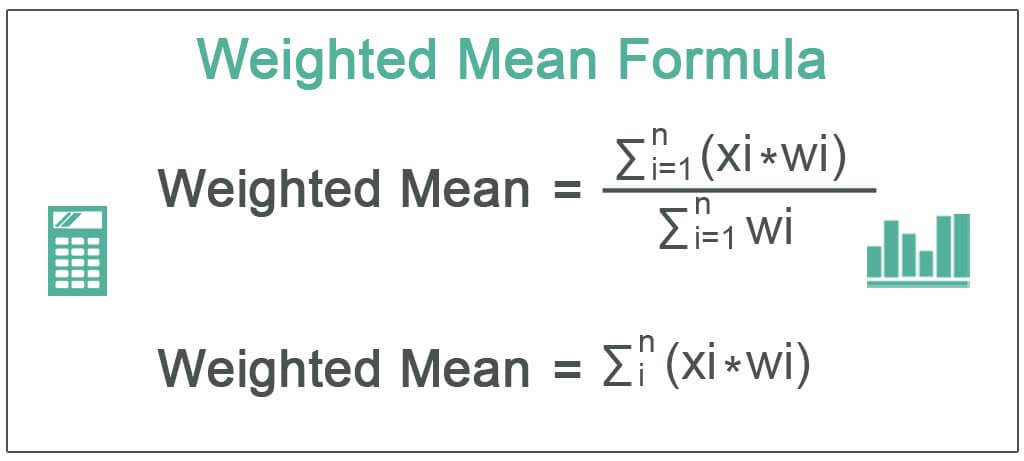

In [60]:
# Solution 1 --> Arithmetic average
chipo.item_price.sum() / chipo.order_id.nunique()

18.811428571428575

In [67]:
chipo.groupby('order_id').item_price.sum().mean()

18.81142857142869

In [68]:
# Solution 2 --> Weighted average
((chipo.groupby('order_id').item_price.sum() / chipo.item_price.sum()) * 
chipo.groupby('order_id').item_price.sum()).sum()

26.025500212172926

### Step 17. How many different items are sold?

In [69]:
chipo.item_name.nunique()

50